In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

## Simulated Annealing

Simulated Annealing (SA) jest stochastycznym algorytmem do znajowania globalnych ekstremówó w dużyc problemach optymalizacyjnych. Wykorzystuje się go bardzo często w problemach optymalizacji wartości dyskretnych.

SA przy każdej iteracji generuje nowy stan, bazujący na obecnym, w którym zmienia losowo jeden bit. Następnie porównywane są wartości nowego i obecnego stanu. Jeżeli wartości nwoego stanu są lepsze od poprzedniego i są akceptowalne (nie przekraczają limitu wagi) są akceptowane. Jeżeli nowo wygenerowany stan jest błędny, poniewaz przykładowo przekracza maksymalną wagę to wciąż może zostać wykorzystany w następnej iteracji w pewnym prawdopodobieństwem. Takie podejście pozwala algorytmowi uciekać z minimów lokalnych.

Do poprawnej pracy algorytmu definiuje się stan początkowy jako pusty plecak oraz parametry wyżarzania, na podsawie których osiągany jest warunek stopu.

In [3]:
from simulatedAnnealing import simulatedAnnealing, plot_best_of_all, plot_best_changes

In [4]:
from pandas import read_csv
max_weight = 3
data_nc16 = read_csv("Data//no_correlation_16")
n_items = data_nc16.shape[0]
values = data_nc16.value.values
weights = data_nc16.weight.values
# np.sqrt(np.sum(data_nc16.weight.values))

In [5]:
np.random.seed(seed=42)
random.seed(a=42)
data = np.array([(temperature, cooling/100) for temperature in range(100, 2700, 200) for cooling in range(90, 102, 3)])
tests = len(data)
results = np.zeros(tests)
last_scores = np.zeros(1000)
for i, dat in enumerate(data):    
    last_scores,_ = simulatedAnnealing(dat[0], dat[1], 0.0001, 16, values, weights, max_weight)
    results[i] = max(last_scores)
    print(f"Tests finished: {i}/{tests-1}", end="\r")

In [6]:
from pandas import DataFrame
df = DataFrame(data=np.transpose([data[:,0], data[:,1], results]), columns=["temp", "cooling", "value"])
df.sort_values(by=['value'], ascending=False, inplace=True)
best_temp = df.values[0][0]
best_cooling = df.values[0][1]
df.head()

,temp,cooling,value
51,2500.0,0.99,4.225162
14,700.0,0.96,4.126425
11,500.0,0.99,4.126425
9,500.0,0.93,4.091106
35,1700.0,0.99,4.091106


In [7]:
# best_temp = df.values[0]

## Visualisations

### Best value in all data

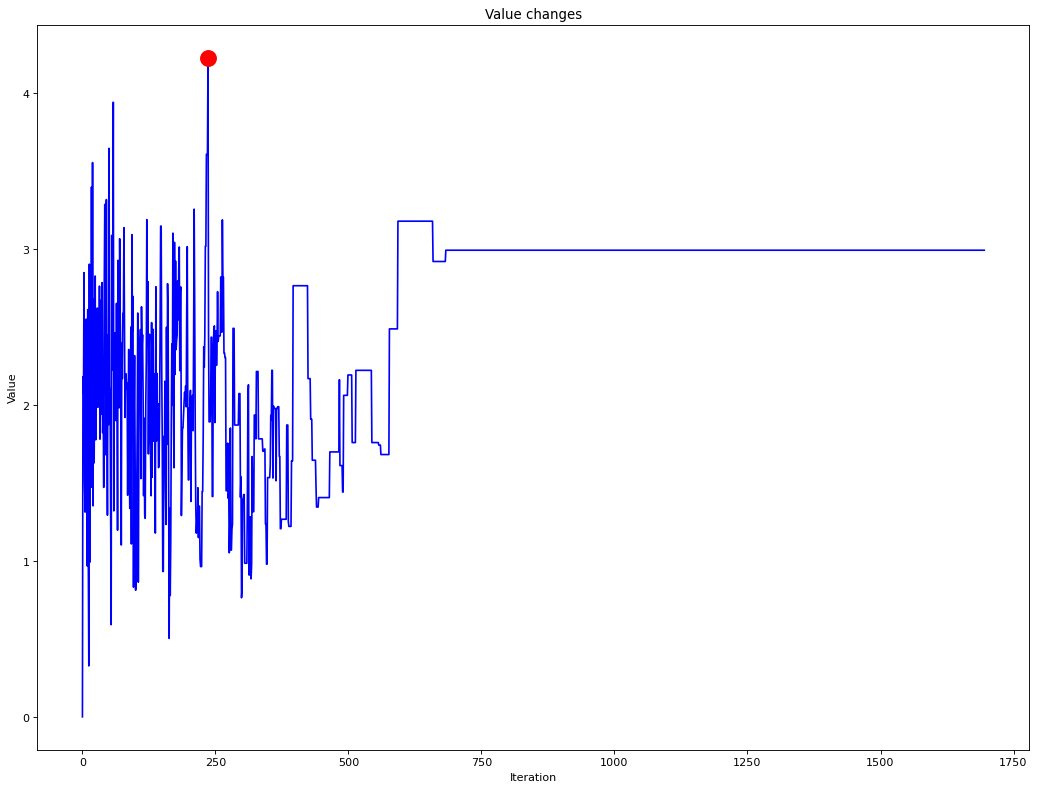

In [8]:
plot_best_of_all(last_scores)

### Best values change plot

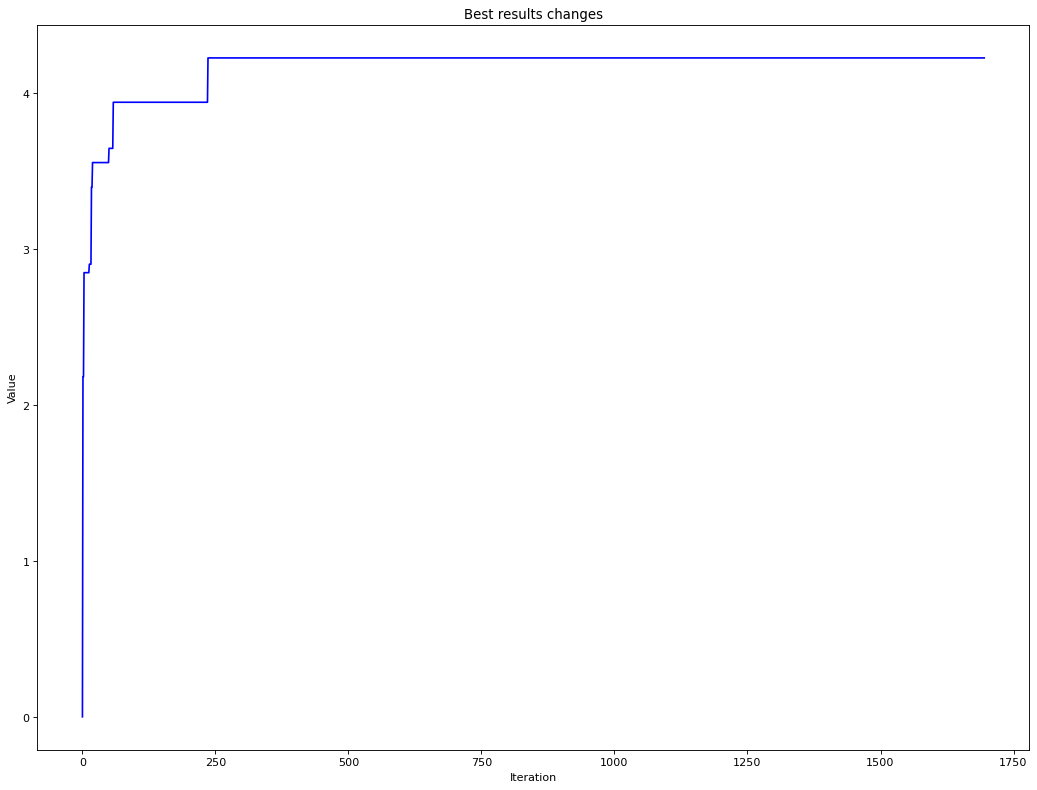

In [9]:
plot_best_changes(last_scores)

## Wnioski

Podana implementacja algorytmu Simulated Annealing z zdanymi parametrami nie znalazła minimum globalnego dla przeszukiwanego zbioru danych, jednakże pokazuje, że algorytm ma potencjał na szukanie minimów globlanych dzięki temu, że potarfi uciekać z minimów lokalnych i lepiej eksplorować cały przeszukiwany obszar. 

Należałoby poszukać jak najlepszych parametrów, które dadzą dobre wyniki. Połączenie z algorytmem genetycznym pozwoli na lepszą eksploatację.

In [10]:
correlation_levels = ["no", "low", "high"]
item_counts = list(range(16,25))
                  
results = np.zeros((len(item_counts), len(correlation_levels)))

for i, level in enumerate(correlation_levels):
    for j, item_count in enumerate(item_counts):
        csv = read_csv(f"Data//{level}_correlation_{item_count}")
        n_items = csv.shape[0]
        values = csv.value.values
        weights = csv.weight.values
        
        scores,_ = simulatedAnnealing(best_temp, best_cooling, 0.0001, item_count, values, weights, max_weight)
        results[j,i] = max(scores)
        print(f"Tests finished: {i*len(item_counts)+j}/{len(item_counts)*len(correlation_levels)-1}", end="\r")
        

In [11]:
df_res = DataFrame(data=results, columns=correlation_levels, index=item_counts)
df_res

,no,low,high
16,3.690178,3.916876,4.827003
17,4.271999,4.952518,5.074306
18,6.794058,7.673430,6.563229
19,4.912355,4.634945,4.917624
20,4.409648,4.222085,4.975506
21,5.815627,5.837355,5.092031
22,4.063167,4.011114,4.780197
23,6.056065,6.352341,6.012291
24,4.582338,4.782561,5.297451


<AxesSubplot:title={'center':'Result for correlated data'}, xlabel='Items', ylabel='Value'>

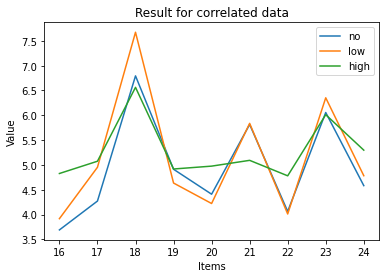

In [12]:
df_res.plot(title="Result for correlated data", xlabel="Items", ylabel="Value")

In [13]:
df_res.to_csv("Results//SA.csv")